In [14]:
!pip install duckdb==0.5.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
from google.colab import drive
drive.mount('/content/drive')

#from google.colab import drive
#drive.flush_and_unmount()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
import duckdb
import pandas as pd
import os
from IPython.display import display
import numpy as np

In [17]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Declaration of auxiliar functions

In [18]:
def generate_table(conn, df, name):
        drop_table(conn, name)
        existingTables=conn.execute("SHOW TABLES").fetchall()
        if(len(existingTables)>0):
            for table in existingTables:
                if(table[0] == name):
                    conn.execute("DROP TABLE " + name)
        conn.execute("CREATE TABLE " + name + " AS SELECT * FROM df")
        
def drop_table(conn, name):
        existingTables=conn.execute("SHOW TABLES").fetchall()
        if(len(existingTables)>0):
            for table in existingTables:
                if(table[0] == name):
                    conn.execute("DROP TABLE " + name)

### Getting dataset

In [19]:
conn = duckdb.connect("/content/drive/MyDrive/ADSDB BASES DE DATOS/copy_DB_FeatureGeneration",read_only=False)
existingTables=conn.execute("SHOW TABLES").fetchall()
existingTables

[('startups_studentsPerformance',)]

In [20]:
df=conn.execute("SELECT * from startups_studentsPerformance".format()).fetchdf()


In [21]:
#show the table 
df.head()

,category_list,market,funding_total_usd,state_code,region,city,funding_rounds,founded_at,founded_month,founded_year,first_funding_at,last_funding_at,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H,ncessch_num,ncessch,year,leaid_num,leaid,fips,read_test_num_valid,read_test_pct_prof_low,read_test_pct_prof_high,read_test_pct_prof_midpt,math_test_num_valid,math_test_pct_prof_high,math_test_pct_prof_midpt,math_test_pct_prof_low,men_read_test_valid,men_math_test_valid,women_read_test_valid,women_math_test_valid,white_read_test_valid,white_math_test_valid,black_read_test_valid,black_math_test_valid,hispanic_read_test_valid,hispanic_math_test_valid,asian_read_test_valid,asian_math_test_valid,native_indian_read_test_valid,native_indian_math_test_valid,more2Races_read_test_valid,more2Races_math_test_valid,lep_read_test_valid,lep_math_test_valid,migrant_read_test_valid,migrant_math_test_valid,disability_read_test_valid,disability_math_test_valid,homeless_read_test_valid,homeless_math_test_valid,econ_disadvantaged_read_test_valid,econ_disadvantaged_math_test_valid,foster_care_read_test_valid,foster_care_math_test_valid,military_connected_read_test_valid,military_connected_math_test_valid,population,nTeachers,enrollment,nPublicSchools,nSchools,status
0,|Enterprise Software|,Enterprise Software,"3,49,000",Unknown,Sheffield,SHEFFIELD,3.830485e-13,2003-01-01,2003-01,7.672461e-10,2006-04-11,2006-04-11,0.0,1.336839e-07,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.707107,0.707107,6.956926e-09,0.000007,0.000007,7.048092e-11,1.028102e-09,1.681583e-10,1.727549e-10,1.704566e-10,1.025038e-09,1.524533e-10,1.501550e-10,1.478567e-10,5.182646e-10,5.174985e-10,5.653795e-10,5.653795e-10,4.052653e-10,4.044992e-10,3.087371e-10,3.079710e-10,2.731136e-10,2.685170e-10,1.800328e-11,1.800328e-11,8.427066e-12,8.810115e-12,3.102693e-11,3.102693e-11,1.026570e-10,1.041892e-10,6.128775e-12,6.511824e-12,1.252568e-10,1.214264e-10,4.060314e-11,3.524046e-11,8.771810e-10,8.825437e-10,4.596582e-12,4.596582e-12,7.660969e-12,8.810115e-12,8.875233e-10,7.086397e-11,8.166593e-10,3.447436e-12,3.447436e-12,operating
1,|Real Estate|,Real Estate,-,UT,Salt Lake City,SOUTH JORDAN,1.935644e-13,2014-08-21,2014-08,3.898387e-10,2014-08-24,2014-08-24,0.0,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.707107,0.707107,6.640421e-09,0.000007,0.000007,7.045744e-11,9.562082e-10,1.469154e-10,1.558193e-10,1.513674e-10,9.577567e-10,1.269783e-10,1.222359e-10,1.174936e-10,4.819754e-10,4.821689e-10,3.640947e-10,3.642882e-10,9.360775e-10,9.027844e-10,3.193813e-10,3.191877e-10,1.885317e-10,1.925966e-10,1.022020e-10,1.035570e-10,1.722723e-11,1.722723e-11,3.232526e-11,3.232526e-11,1.742080e-11,1.761436e-11,3.097031e-12,4.064853e-12,9.523369e-11,9.465300e-11,1.896931e-11,1.993713e-11,3.952585e-10,4.043561e-10,3.677724e-12,4.258417e-12,6.000497e-12,6.000497e-12,2.510918e-09,-3.287304e-09,2.510918e-09,3.290595e-12,3.290595e-12,operating
2,|Software|,Software,"20,00,00,000",NY,New York City,HAWTHORNE,8.238600e-14,1999-01-01,1999-01,1.646896e-10,2013-09-12,2013-09-12,0.0,0.000000e+00,0.0,0.0,0.0,0.000016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.707107,0.707107,5.320158e-09,0.000007,0.000007,7.044003e-11,6.715283e-10,1.126217e-10,1.249796e-10,1.188006e-10,6.994571e-10,1.091614e-10,1.029825e-10,9.680355e-11,4.152254e-10,4.064925e-10,4.102823e-10,4.179442e-10,2.441097e-10,2.441097e-10,1.015819e-10,1.011700e-10,2.648710e-10,2.624818e-10,5.124409e-11,5.215034e-11,4.943160e-12,5.190318e-12,3.682654e-11,3.699131e-11,1.617237e-10,1.620533e-10,3.048282e-12,2.965896e-12,1.010876e-10,1.011700e-10,3.822710e-11,3.839188e-11,4.809695e-10,4.916796e-10,3.789756e-12,3.954528e-12,1.499425e-11,1.499425e-11,1.374

In [22]:
conn.close()


# Data integration

In [23]:
df['status'].value_counts()

operating    4000
closed       4000
acquired     4000
Name: status, dtype: int64

In [24]:
#funding total usd
df.columns = df.columns.str.strip()
df['funding_total_usd'] = df['funding_total_usd'].str.strip().str.replace(",","")
df['funding_total_usd'] = df['funding_total_usd'].replace("-",0).astype("float")
df['funding_total_usd'].describe()

count    1.200000e+04
mean     1.424144e+07
std      8.378640e+07
min      0.000000e+00
25%      1.859000e+05
50%      2.000000e+06
75%      1.050000e+07
max      5.700000e+09
Name: funding_total_usd, dtype: float64

# **Transformations**

In [25]:
import numpy as np
from scipy import stats
 
# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
def drawPlots(originalData,fitted_data,fitted_lambda):
  # creating axes to draw plots
  fig, ax = plt.subplots(1, 2)
  
  # plotting the original data(non-normal) and
  # fitted data (normal)
  sns.distplot(originalData, hist = False, kde = True,
              kde_kws = {'shade': True, 'linewidth': 2},
              label = "Non-Normal", color ="green", ax = ax[0])
  
  sns.distplot(fitted_data, hist = False, kde = True,
              kde_kws = {'shade': True, 'linewidth': 2},
              label = "Normal", color ="green", ax = ax[1])
  
  # adding legends to the subplots
  plt.legend(loc = "upper right")
  
  # rescaling the subplots
  fig.set_figheight(5)
  fig.set_figwidth(10)
  
  print(f"Lambda value used for Transformation: {fitted_lambda}")

**Transforming funding_total_usd**

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Lambda value used for Transformation: 0.14458699870189126


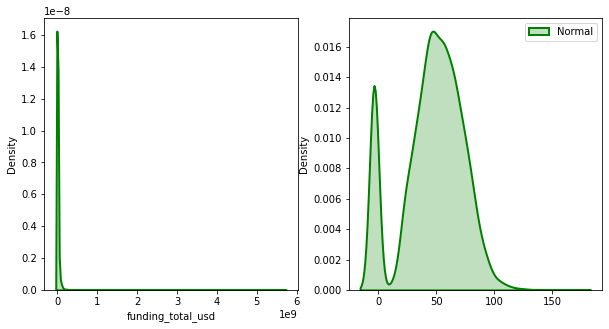

In [27]:
# transform training data & save lambda value
fitted_data, fitted_lambda = stats.boxcox(df['funding_total_usd']+0.01)
df['transformed_funding_total_usd']=fitted_data
drawPlots(df['funding_total_usd']+0.01,fitted_data,fitted_lambda)

status
acquired     AxesSubplot(0.125,0.125;0.775x0.755)
closed       AxesSubplot(0.125,0.125;0.775x0.755)
operating    AxesSubplot(0.125,0.125;0.775x0.755)
Name: transformed_funding_total_usd, dtype: object

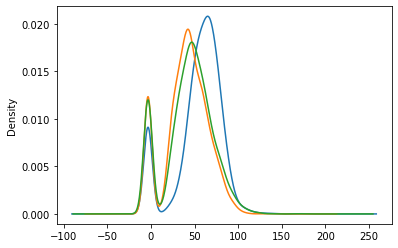

In [28]:
df.groupby('status')['transformed_funding_total_usd'].plot(kind='kde')

**Transforming venture**

/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:233: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:244: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel de

Lambda value used for Transformation: -77.66825358929171


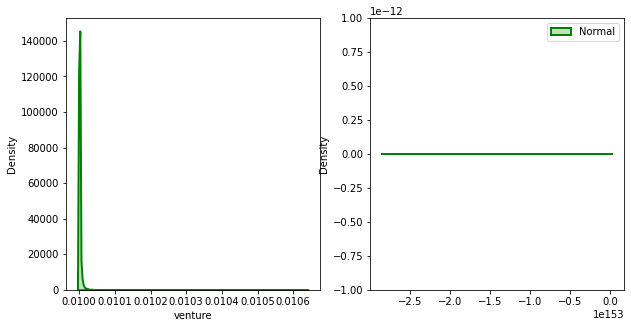

In [29]:
# transform training data & save lambda value
fitted_data, fitted_lambda = stats.boxcox(df['venture']+0.01)
df['transformed_venture']=fitted_data
drawPlots(df['venture']+0.01,fitted_data,fitted_lambda)

status
acquired     AxesSubplot(0.125,0.125;0.775x0.755)
closed       AxesSubplot(0.125,0.125;0.775x0.755)
operating    AxesSubplot(0.125,0.125;0.775x0.755)
Name: transformed_venture, dtype: object

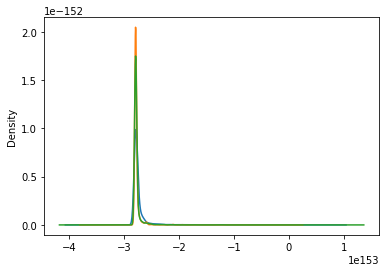

In [30]:
df.groupby('status')['transformed_venture'].plot(kind='kde')

**Transforming debt_financing**

/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:233: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:244: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel de

Lambda value used for Transformation: -77.85459764622856


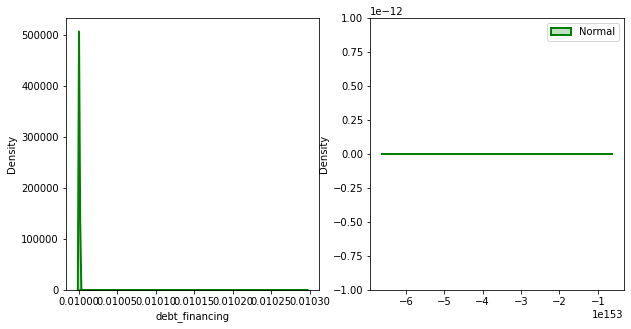

In [31]:
fitted_data, fitted_lambda = stats.boxcox(df['debt_financing']+0.01)
df['transformed_debt_financing']=fitted_data
drawPlots(df['debt_financing']+0.01,fitted_data,fitted_lambda)

status
acquired     AxesSubplot(0.125,0.125;0.775x0.755)
closed       AxesSubplot(0.125,0.125;0.775x0.755)
operating    AxesSubplot(0.125,0.125;0.775x0.755)
Name: transformed_debt_financing, dtype: object

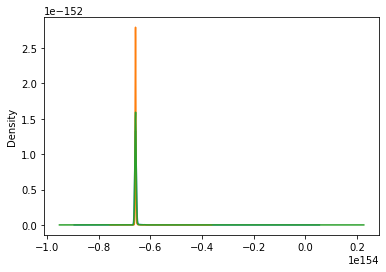

In [32]:
df.groupby('status')['transformed_debt_financing'].plot(kind='kde')

# **New Feafures Generation**

In [33]:
df.head()

,category_list,market,funding_total_usd,state_code,region,city,funding_rounds,founded_at,founded_month,founded_year,first_funding_at,last_funding_at,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H,ncessch_num,ncessch,year,leaid_num,leaid,fips,read_test_num_valid,read_test_pct_prof_low,read_test_pct_prof_high,read_test_pct_prof_midpt,math_test_num_valid,math_test_pct_prof_high,math_test_pct_prof_midpt,math_test_pct_prof_low,men_read_test_valid,men_math_test_valid,women_read_test_valid,women_math_test_valid,white_read_test_valid,white_math_test_valid,black_read_test_valid,black_math_test_valid,hispanic_read_test_valid,hispanic_math_test_valid,asian_read_test_valid,asian_math_test_valid,native_indian_read_test_valid,native_indian_math_test_valid,more2Races_read_test_valid,more2Races_math_test_valid,lep_read_test_valid,lep_math_test_valid,migrant_read_test_valid,migrant_math_test_valid,disability_read_test_valid,disability_math_test_valid,homeless_read_test_valid,homeless_math_test_valid,econ_disadvantaged_read_test_valid,econ_disadvantaged_math_test_valid,foster_care_read_test_valid,foster_care_math_test_valid,military_connected_read_test_valid,military_connected_math_test_valid,population,nTeachers,enrollment,nPublicSchools,nSchools,status,transformed_funding_total_usd,transformed_venture,transformed_debt_financing
0,|Enterprise Software|,Enterprise Software,349000.0,Unknown,Sheffield,SHEFFIELD,3.830485e-13,2003-01-01,2003-01,7.672461e-10,2006-04-11,2006-04-11,0.0,1.336839e-07,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.707107,0.707107,6.956926e-09,0.000007,0.000007,7.048092e-11,1.028102e-09,1.681583e-10,1.727549e-10,1.704566e-10,1.025038e-09,1.524533e-10,1.501550e-10,1.478567e-10,5.182646e-10,5.174985e-10,5.653795e-10,5.653795e-10,4.052653e-10,4.044992e-10,3.087371e-10,3.079710e-10,2.731136e-10,2.685170e-10,1.800328e-11,1.800328e-11,8.427066e-12,8.810115e-12,3.102693e-11,3.102693e-11,1.026570e-10,1.041892e-10,6.128775e-12,6.511824e-12,1.252568e-10,1.214264e-10,4.060314e-11,3.524046e-11,8.771810e-10,8.825437e-10,4.596582e-12,4.596582e-12,7.660969e-12,8.810115e-12,8.875233e-10,7.086397e-11,8.166593e-10,3.447436e-12,3.447436e-12,operating,36.865311,-2.791340e+153,-6.575231e+153
1,|Real Estate|,Real Estate,0.0,UT,Salt Lake City,SOUTH JORDAN,1.935644e-13,2014-08-21,2014-08,3.898387e-10,2014-08-24,2014-08-24,0.0,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.707107,0.707107,6.640421e-09,0.000007,0.000007,7.045744e-11,9.562082e-10,1.469154e-10,1.558193e-10,1.513674e-10,9.577567e-10,1.269783e-10,1.222359e-10,1.174936e-10,4.819754e-10,4.821689e-10,3.640947e-10,3.642882e-10,9.360775e-10,9.027844e-10,3.193813e-10,3.191877e-10,1.885317e-10,1.925966e-10,1.022020e-10,1.035570e-10,1.722723e-11,1.722723e-11,3.232526e-11,3.232526e-11,1.742080e-11,1.761436e-11,3.097031e-12,4.064853e-12,9.523369e-11,9.465300e-11,1.896931e-11,1.993713e-11,3.952585e-10,4.043561e-10,3.677724e-12,4.258417e-12,6.000497e-12,6.000497e-12,2.510918e-09,-3.287304e-09,2.510918e-09,3.290595e-12,3.290595e-12,operating,-3.362420,-2.794240e+153,-6.575231e+153
2,|Software|,Software,200000000.0,NY,New York City,HAWTHORNE,8.238600e-14,1999-01-01,1999-01,1.646896e-10,2013-09-12,2013-09-12,0.0,0.000000e+00,0.0,0.0,0.0,0.000016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.707107,0.707107,5.320158e-09,0.000007,0.000007,7.044003e-11,6.715283e-10,1.126217e-10,1.249796e-10,1.188006e-10,6.994571e-10,1.091614e-10,1.029825e-10,9.680355e-11,4.152254e-10,4.064925e-10,4.102823e-10,4.179442e-10,2.441097e-10,2.441097e-10,1.015819e-10,1.011700e-10,2.648710e-10,2.624818e-10,5.124409e-11,5.215034e-11,4.943160e-12,5.190318e-12,3.682654e-11,3.699131e-11,1.617237e-10,1.620533e-10,3.04828

In [34]:
from datetime import datetime
scrappedDate = datetime.strptime('2018-01-01', '%Y-%m-%d')

In [35]:
df['founded_at']=pd.to_datetime(df['founded_at'], errors = 'coerce')
df['first_funding_at']=pd.to_datetime(df['first_funding_at'], errors = 'coerce')
df['last_funding_at']=pd.to_datetime(df['last_funding_at'], errors = 'coerce')

In [36]:
df['nFoundedDays']=scrappedDate-df['founded_at']

In [37]:
df['nPrivateSchools']=df['nSchools']-df['nPublicSchools']

In [38]:
df['teachersPerStudent']=df['nTeachers'] / df['enrollment']

In [39]:
df['%noWhiteReadValid']=(df['read_test_num_valid']-df['white_read_test_valid'])/df['read_test_num_valid']
df['%noWhiteMathValid']=(df['math_test_num_valid']-df['white_math_test_valid'])/df['math_test_num_valid']

In [40]:
df['%EcoDisadReadValid']=df['econ_disadvantaged_read_test_valid']/df['read_test_num_valid']
df['%EcoDisadMathValid']=df['econ_disadvantaged_math_test_valid']/df['math_test_num_valid']


In [41]:
df['%asianReadValid']=df['asian_read_test_valid']/df['read_test_num_valid']
df['%asianMathValid']=df['asian_math_test_valid']/df['math_test_num_valid']

In [42]:
df.head()

,category_list,market,funding_total_usd,state_code,region,city,funding_rounds,founded_at,founded_month,founded_year,first_funding_at,last_funding_at,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H,ncessch_num,ncessch,year,leaid_num,leaid,fips,read_test_num_valid,read_test_pct_prof_low,read_test_pct_prof_high,read_test_pct_prof_midpt,math_test_num_valid,math_test_pct_prof_high,math_test_pct_prof_midpt,math_test_pct_prof_low,men_read_test_valid,men_math_test_valid,women_read_test_valid,women_math_test_valid,white_read_test_valid,white_math_test_valid,black_read_test_valid,black_math_test_valid,hispanic_read_test_valid,hispanic_math_test_valid,asian_read_test_valid,asian_math_test_valid,native_indian_read_test_valid,native_indian_math_test_valid,more2Races_read_test_valid,more2Races_math_test_valid,lep_read_test_valid,lep_math_test_valid,migrant_read_test_valid,migrant_math_test_valid,disability_read_test_valid,disability_math_test_valid,homeless_read_test_valid,homeless_math_test_valid,econ_disadvantaged_read_test_valid,econ_disadvantaged_math_test_valid,foster_care_read_test_valid,foster_care_math_test_valid,military_connected_read_test_valid,military_connected_math_test_valid,population,nTeachers,enrollment,nPublicSchools,nSchools,status,transformed_funding_total_usd,transformed_venture,transformed_debt_financing,nFoundedDays,nPrivateSchools,teachersPerStudent,%noWhiteReadValid,%noWhiteMathValid,%EcoDisadReadValid,%EcoDisadMathValid,%asianReadValid,%asianMathValid
0,|Enterprise Software|,Enterprise Software,349000.0,Unknown,Sheffield,SHEFFIELD,3.830485e-13,2003-01-01,2003-01,7.672461e-10,2006-04-11,2006-04-11,0.0,1.336839e-07,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.707107,0.707107,6.956926e-09,0.000007,0.000007,7.048092e-11,1.028102e-09,1.681583e-10,1.727549e-10,1.704566e-10,1.025038e-09,1.524533e-10,1.501550e-10,1.478567e-10,5.182646e-10,5.174985e-10,5.653795e-10,5.653795e-10,4.052653e-10,4.044992e-10,3.087371e-10,3.079710e-10,2.731136e-10,2.685170e-10,1.800328e-11,1.800328e-11,8.427066e-12,8.810115e-12,3.102693e-11,3.102693e-11,1.026570e-10,1.041892e-10,6.128775e-12,6.511824e-12,1.252568e-10,1.214264e-10,4.060314e-11,3.524046e-11,8.771810e-10,8.825437e-10,4.596582e-12,4.596582e-12,7.660969e-12,8.810115e-12,8.875233e-10,7.086397e-11,8.166593e-10,3.447436e-12,3.447436e-12,operating,36.865311,-2.791340e+153,-6.575231e+153,5479 days,0.000000e+00,0.086773,0.605812,0.605381,0.853204,0.860987,0.017511,0.017564
1,|Real Estate|,Real Estate,0.0,UT,Salt Lake City,SOUTH JORDAN,1.935644e-13,2014-08-21,2014-08,3.898387e-10,2014-08-24,2014-08-24,0.0,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.707107,0.707107,6.640421e-09,0.000007,0.000007,7.045744e-11,9.562082e-10,1.469154e-10,1.558193e-10,1.513674e-10,9.577567e-10,1.269783e-10,1.222359e-10,1.174936e-10,4.819754e-10,4.821689e-10,3.640947e-10,3.642882e-10,9.360775e-10,9.027844e-10,3.193813e-10,3.191877e-10,1.885317e-10,1.925966e-10,1.022020e-10,1.035570e-10,1.722723e-11,1.722723e-11,3.232526e-11,3.232526e-11,1.742080e-11,1.761436e-11,3.097031e-12,4.064853e-12,9.523369e-11,9.465300e-11,1.896931e-11,1.993713e-11,3.952585e-10,4.043561e-10,3.677724e-12,4.258417e-12,6.000497e-12,6.000497e-12,2.510918e-09,-3.287304e-09,2.510918e-09,3.290595e-12,3.290595e-12,operating,-3.362420,-2.794240e+153,-6.575231e+153,1229 days,0.000000e+00,-1.309204,0.021053,0.057397,0.413360,0.422191,0.106883,0.108124
2,|Software|,Software,200000000.0,NY,New York City,HAWTHORNE,8.238600e-14,1999-01-01,1999-01,1.646896e-10,2013-09-12,2013-09-12,0.0,0.000000e+00,0.0,0.0,0.0,0.000016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.707107,0.707107,5.320158e-09,0.000007,0.000007,7.044003e-11,6.715283e-10,1.126

In [43]:
cols_delete = ['founded_at', 'ncessch_num', 'ncessch', 'leaid_num','year','leaid','fips',]
df = df.drop(cols_delete, axis=1)

In [44]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)
# 'RdBu_r', 'BrBG_r', & PuOr_r are other good diverging colormaps

<ipython-input-44-d79eb2ba45a2>:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)
/usr/local/lib/python3.8/dist-packages/pandas/io/formats/style.py:2813: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/usr/local/lib/python3.8/dist-packages/pandas/io/formats/style.py:2814: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


# **Conexion to database**

In [45]:
conn = duckdb.connect("/content/drive/MyDrive/ADSDB BASES DE DATOS/copy_DB_FeatureGeneration",read_only=False)

In [46]:
generate_table(conn,df,"startups_studentsPerformance")

In [47]:
#show the table 
df=conn.execute("SELECT * from startups_studentsPerformance").fetchdf()
df.head()

,category_list,market,funding_total_usd,state_code,region,city,funding_rounds,founded_month,founded_year,first_funding_at,last_funding_at,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H,read_test_num_valid,read_test_pct_prof_low,read_test_pct_prof_high,read_test_pct_prof_midpt,math_test_num_valid,math_test_pct_prof_high,math_test_pct_prof_midpt,math_test_pct_prof_low,men_read_test_valid,men_math_test_valid,women_read_test_valid,women_math_test_valid,white_read_test_valid,white_math_test_valid,black_read_test_valid,black_math_test_valid,hispanic_read_test_valid,hispanic_math_test_valid,asian_read_test_valid,asian_math_test_valid,native_indian_read_test_valid,native_indian_math_test_valid,more2Races_read_test_valid,more2Races_math_test_valid,lep_read_test_valid,lep_math_test_valid,migrant_read_test_valid,migrant_math_test_valid,disability_read_test_valid,disability_math_test_valid,homeless_read_test_valid,homeless_math_test_valid,econ_disadvantaged_read_test_valid,econ_disadvantaged_math_test_valid,foster_care_read_test_valid,foster_care_math_test_valid,military_connected_read_test_valid,military_connected_math_test_valid,population,nTeachers,enrollment,nPublicSchools,nSchools,status,transformed_funding_total_usd,transformed_venture,transformed_debt_financing,nFoundedDays,nPrivateSchools,teachersPerStudent,%noWhiteReadValid,%noWhiteMathValid,%EcoDisadReadValid,%EcoDisadMathValid,%asianReadValid,%asianMathValid
0,|Enterprise Software|,Enterprise Software,349000.0,Unknown,Sheffield,SHEFFIELD,3.830485e-13,2003-01,7.672461e-10,2006-04-11,2006-04-11,0.0,1.336839e-07,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.028102e-09,1.681583e-10,1.727549e-10,1.704566e-10,1.025038e-09,1.524533e-10,1.501550e-10,1.478567e-10,5.182646e-10,5.174985e-10,5.653795e-10,5.653795e-10,4.052653e-10,4.044992e-10,3.087371e-10,3.079710e-10,2.731136e-10,2.685170e-10,1.800328e-11,1.800328e-11,8.427066e-12,8.810115e-12,3.102693e-11,3.102693e-11,1.026570e-10,1.041892e-10,6.128775e-12,6.511824e-12,1.252568e-10,1.214264e-10,4.060314e-11,3.524046e-11,8.771810e-10,8.825437e-10,4.596582e-12,4.596582e-12,7.660969e-12,8.810115e-12,8.875233e-10,7.086397e-11,8.166593e-10,3.447436e-12,3.447436e-12,operating,36.865311,-2.791340e+153,-6.575231e+153,5479 days,0.000000e+00,0.086773,0.605812,0.605381,0.853204,0.860987,0.017511,0.017564
1,|Real Estate|,Real Estate,0.0,UT,Salt Lake City,SOUTH JORDAN,1.935644e-13,2014-08,3.898387e-10,2014-08-24,2014-08-24,0.0,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.562082e-10,1.469154e-10,1.558193e-10,1.513674e-10,9.577567e-10,1.269783e-10,1.222359e-10,1.174936e-10,4.819754e-10,4.821689e-10,3.640947e-10,3.642882e-10,9.360775e-10,9.027844e-10,3.193813e-10,3.191877e-10,1.885317e-10,1.925966e-10,1.022020e-10,1.035570e-10,1.722723e-11,1.722723e-11,3.232526e-11,3.232526e-11,1.742080e-11,1.761436e-11,3.097031e-12,4.064853e-12,9.523369e-11,9.465300e-11,1.896931e-11,1.993713e-11,3.952585e-10,4.043561e-10,3.677724e-12,4.258417e-12,6.000497e-12,6.000497e-12,2.510918e-09,-3.287304e-09,2.510918e-09,3.290595e-12,3.290595e-12,operating,-3.362420,-2.794240e+153,-6.575231e+153,1229 days,0.000000e+00,-1.309204,0.021053,0.057397,0.413360,0.422191,0.106883,0.108124
2,|Software|,Software,200000000.0,NY,New York City,HAWTHORNE,8.238600e-14,1999-01,1.646896e-10,2013-09-12,2013-09-12,0.0,0.000000e+00,0.0,0.0,0.0,0.000016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.715283e-10,1.126217e-10,1.249796e-10,1.188006e-10,6.994571e-10,1.091614e-10,1.029825e-10,9.680355e-11,4.152254e-10,4.064925e-10,4.102823e-10,4.179442e-10,2.441097e-10,2.441097e-10,1.015819e-10,1.011700e-10,2.648710e-10,2.624818e-10,5.124409e-11,5.215034e-11,4.943160e-12,5.190318e-12,3.682654

In [48]:
conn.close()